In [ ]:
!pip install numpy pandas matplotlib scikit-learn tensorflow


In [ ]:
def read_data (path = '/content/fdata_Timestep_60 (2).txt'):
    with open(path) as f:
        lines = f.read().splitlines()
    series = np.array(list(map(int, lines)))
    return series


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import RMSprop

def build_seq2seq_model(look_ahead=1, look_back=10):
    m = Sequential()
    # Define the input shape in the first layer
    m.add(GRU(16, input_shape=(look_back, 1), return_sequences=False))
    m.add(RepeatVector(look_ahead))
    m.add(GRU(8, return_sequences=True))
    m.add(GRU(8, return_sequences=True))
    m.add(TimeDistributed(Dense(1)))
    m.compile(loss='mse', optimizer='rmsprop', metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])
    return m

# Example of usage
look_ahead = 1
look_back = 10  # Ensure this matches the look_back parameter in create_datasets
model = build_seq2seq_model(look_ahead=look_ahead, look_back=look_back)
print(model.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 16)                  │             912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 1, 16)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 1, 8)                │             624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 1, 8)                │             432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 1, 1)                │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,977 (7.72 KB)

 Trainable params: 1,977 (7.72 KB)

 Non-trainable params: 0 (0.00 B)

None


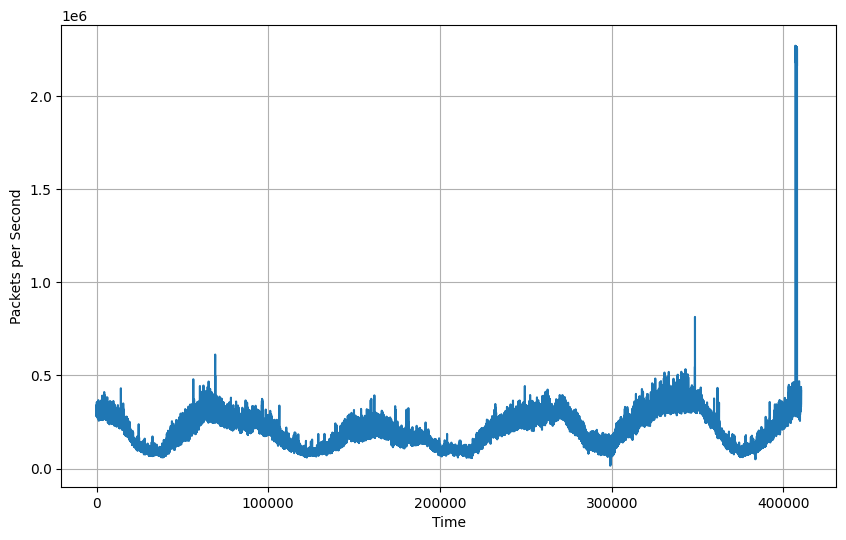

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
10256/10256 ━━━━━━━━━━━━━━━━━━━━ 267s 26ms/step - loss: 39955791872.0000 - mean_absolute_percentage_error: 99.9783 - val_loss: 128913203200.0000 - val_mean_absolute_percentage_error: 99.9492
Epoch 2/20
10256/10256 ━━━━━━━━━━━━━━━━━━━━ 325s 26ms/step - loss: 40046317568.0000 - mean_absolute_percentage_error: 99.9220 - val_loss: 128864231424.0000 - val_mean_absolute_percentage_error: 99.9003
Epoch 3/20
10256/10256 ━━━━━━━━━━━━━━━━━━━━ 320s 26ms/step - loss: 39910375424.0000 - mean_absolute_percentage_error: 99.8636 - val_loss: 128815415296.0000 - val_mean_absolute_percentage_error: 99.8515
Epoch 4/20
10256/10256 ━━━━━━━━━━━━━━━━━━━━ 287s 28ms/step - loss: 39943647232.0000 - mean_absolute_percentage_error: 99.8048 - val_loss: 128766623744.0000 - val_mean_absolute_percentage_error: 99.8023
Epoch 5/20
10256/10256 ━━━━━━━━━━━━━━━━━━━━ 297s 26ms/step - loss: 39850172416.0000 - mean_absolute_percentage_error: 99.7447 - val_loss: 128717692928.0000 - val_mean_absolute_percentage_error

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, RepeatVector, TimeDistributed, Dense
from sklearn.metrics import mean_squared_error
import math

def read_data(path='/content/fdata_Timestep_1 .txt'):
    with open(path) as f:
        lines = f.read().splitlines()
    series = np.array(list(map(int, lines)))
    return series

def train_test_split(dataset, train_frac):
    train_size = int(len(dataset) * train_frac)
    return dataset[:train_size], dataset[train_size:]

def create_datasets(dataset, look_back=1, look_ahead=1):
    data_x, data_y = [], []
    for i in range(len(dataset) - look_back - look_ahead + 1):
        window = dataset[i:(i + look_back)]
        data_x.append(window)
        data_y.append(dataset[i + look_back:i + look_back + look_ahead])
    return np.array(data_x), np.array(data_y)

def plot_series(time, series, format="-", start=0, end=None, figsize=(10,6), xlabel="Time", ylabel="Packets per Second"):
    plt.figure(figsize=figsize)
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

def plot_hist(data, bins=20, xlabel="", ylabel="", title=""):
    plt.hist(data, bins, color='green', edgecolor='black')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

def build_seq2seq_model(look_ahead=1, look_back=10):
    m = Sequential()
    m.add(GRU(16, input_shape=(look_back, 1), return_sequences=False))
    m.add(RepeatVector(look_ahead))
    m.add(GRU(8, return_sequences=True))
    m.add(GRU(8, return_sequences=True))
    m.add(TimeDistributed(Dense(1)))
    m.compile(loss='mse', optimizer='rmsprop', metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])
    return m

def reverse_scale(data, mean, std):
    for x in np.nditer(data, op_flags=['readwrite']):
        x[...] = x * std + mean
    return data

def calculate_error(train_y, test_y, pred_train, pred_test):
    train_y_flat = train_y.reshape(-1)
    test_y_flat = test_y.reshape(-1)
    pred_train_flat = pred_train.reshape(-1)
    pred_test_flat = pred_test.reshape(-1)

    test_score = math.sqrt(mean_squared_error(test_y_flat, pred_test_flat))
    train_score = math.sqrt(mean_squared_error(train_y_flat, pred_train_flat))
    return train_score, test_score

def mean_absolute_percentage(y, y_pred):
    return np.mean(np.abs((y - y_pred) / y)) * 100

def plot_1_error(pred_test, test_y, er1):
    plt.figure(figsize=(18, 13))
    plt.plot(test_y, label="Observed")
    plt.plot(pred_test, color="red", label="Predicted, MAPE: " + str(round(er1, 5)) + "%")
    plt.title("1 step ahead prediction")
    plt.ylabel("Number of Packets / minute")
    plt.legend(loc=1, fontsize=8, framealpha=0.8)
    plt.show()

def plot_4_errors(pred_test, test_y, er1, er2, er3, er4):
    fig = plt.figure(1, (18, 13))
    plt.subplot(221)
    plt.plot(test_y[:, 0], label="Observed")
    plt.plot(pred_test[:, 0], color="red", label="Predicted, MAPE: " + str(round(er1, 5)) + "%")
    plt.title("1 step ahead prediction")
    plt.ylabel("Number of Packets / minute")
    plt.legend(loc=1, fontsize=8, framealpha=0.8)

    if test_y.shape[1] > 1:  # Ensure there are enough steps
        plt.subplot(222)
        if test_y.shape[1] > 3:
            plt.plot(test_y[:, 3], color="red", label="Predicted, MAPE: " + str(round(er2, 5)) + "%")
            plt.plot(test_y[:, 3], label="Observed")
            plt.title("4 step ahead prediction")
            plt.legend(loc=1, fontsize=8, framealpha=0.8)

    if test_y.shape[1] > 7:  # Ensure there are enough steps
        plt.subplot(223)
        if test_y.shape[1] > 7:
            plt.plot(test_y[:, 7], color="red", label="Predicted, MAPE: " + str(round(er3, 5)) + "%")
            plt.plot(test_y[:, 7], label="Observed")
            plt.title("8 step ahead prediction")
            plt.legend(loc=1, fontsize=8, framealpha=0.8)

    if test_y.shape[1] > 15:  # Ensure there are enough steps
        plt.subplot(224)
        if test_y.shape[1] > 15:
            plt.plot(test_y[:, 15], color="red", label="Predicted, MAPE: " + str(round(er4, 5)) + "%")
            plt.plot(test_y[:, 15], label="Observed")
            plt.title("16 step ahead prediction")
            plt.legend(loc=1, fontsize=8, framealpha=0.8)


    plt.show()

# Example Workflow
# Assuming the data is already uploaded to Google Colab

# Step 1: Load the data
series = read_data()

# Step 2: Plot the series (Optional)
plot_series(range(len(series)), series)

# Step 3: Split the data into training and testing sets
train_data, test_data = train_test_split(series, 0.8)

# Step 4: Create datasets for the model
look_back = 10
look_ahead = 16
train_x, train_y = create_datasets(train_data, look_back, look_ahead)
test_x, test_y = create_datasets(test_data, look_back, look_ahead)

# Step 5: Build the model
model = build_seq2seq_model(look_ahead, look_back)

# Step 6: Train the model
history = model.fit(train_x, train_y, epochs=20, batch_size=32, validation_data=(test_x, test_y), verbose=1)

# Step 7: Make predictions
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

# Step 8: Calculate and print errors
train_score, test_score = calculate_error(train_y, test_y, pred_train, pred_test)
print(f'Train Score: {train_score:.2f} RMSE')
print(f'Test Score: {test_score:.2f} RMSE')

# Step 9: Plot the prediction errors
# For look_ahead=1, accessing index 0
er1 = mean_absolute_percentage(test_y[:, 0], pred_test[:, 0])
plot_1_error(pred_test[:, 0], test_y[:, 0], er1)

# For look_ahead=16, accessing different indices for multi-step predictions
if test_y.shape[1] > 1:  # Check if the test_y has more than 1 step ahead
    er2 = mean_absolute_percentage(test_y[:, 3], pred_test[:, 3])
    er3 = mean_absolute_percentage(test_y[:, 7], pred_test[:, 7])
    er4 = mean_absolute_percentage(test_y[:, 15], pred_test[:, 15])
    plot_4_errors(pred_test, test_y, er1, er2, er3, er4)
else:
    print("Not enough steps ahead in test_y and pred_test for multi-step error plotting.")


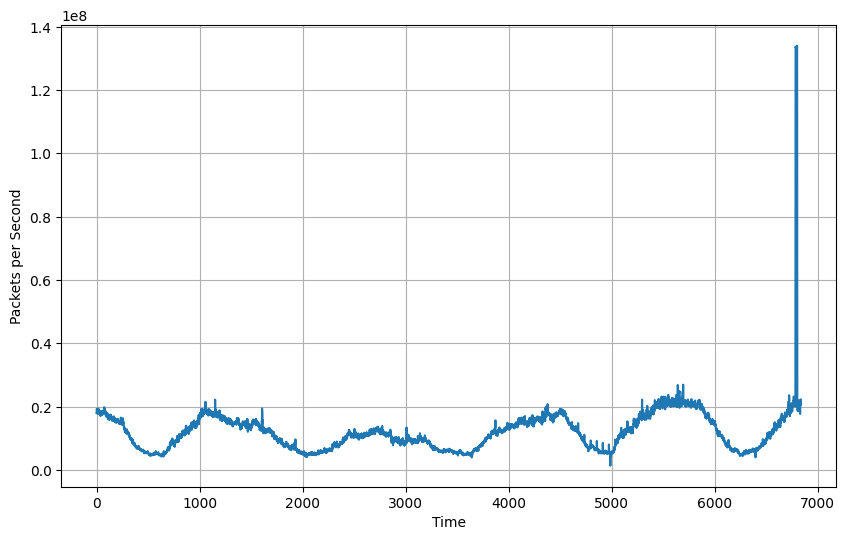

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 141561820086272.0000 - mean_absolute_percentage_error: 100.0000 - val_loss: 460940688490496.0000 - val_mean_absolute_percentage_error: 100.0000
Epoch 2/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 140821038891008.0000 - mean_absolute_percentage_error: 100.0000 - val_loss: 460940621381632.0000 - val_mean_absolute_percentage_error: 100.0000
Epoch 3/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 143495092240384.0000 - mean_absolute_percentage_error: 100.0000 - val_loss: 460940587827200.0000 - val_mean_absolute_percentage_error: 99.9999
Epoch 4/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 144748148948992.0000 - mean_absolute_percentage_error: 100.0000 - val_loss: 460940520718336.0000 - val_mean_absolute_percentage_error: 99.9999
Epoch 5/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 145024083820544.0000 - mean_absolute_percentage_error: 100.0000 - val_loss: 460940453609472.0000 - val_mean_absolute_per

NameError: name 'calculate_error' is not defined

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense
from sklearn.metrics import mean_squared_error
import math

def read_data (path = '/content/fdata_Timestep_60 (2).txt'):
    with open(path) as f:
        lines = f.read().splitlines()
    series = np.array(list(map(int, lines)))
    return series

def train_test_split(dataset, train_frac):
    train_size = int(len(dataset) * train_frac)
    return dataset[:train_size], dataset[train_size:]

def create_datasets(dataset, look_back=1, look_ahead=1):
    data_x, data_y = [], []
    for i in range(len(dataset) - look_back - look_ahead + 1):
        window = dataset[i:(i + look_back)]
        data_x.append(window)
        data_y.append(dataset[i + look_back:i + look_back + look_ahead])
    return np.array(data_x), np.array(data_y)

def plot_series(time, series, format="-", start=0, end=None, figsize=(10,6), xlabel="Time", ylabel="Packets per Second"):
    plt.figure(figsize=figsize)
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

def plot_hist(data, bins=20, xlabel="", ylabel="", title=""):
    plt.hist(data, bins, color='green', edgecolor='black')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


# Rest of the functions remain the same: read_data, train_test_split, create_datasets, plot_series, plot_hist

def build_seq2seq_model_lstm(look_ahead=1, look_back=10):
    model = Sequential()
    model.add(LSTM(16, input_shape=(look_back, 1), return_sequences=False))
    model.add(RepeatVector(look_ahead))
    model.add(LSTM(8, return_sequences=True))
    model.add(LSTM(8, return_sequences=True))
    model.add(TimeDistributed(Dense(1)))
    model.compile(loss='mse', optimizer='rmsprop', metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])
    return model

# The function to calculate errors and plotting functions remain the same: reverse_scale, calculate_error, mean_absolute_percentage, plot_1_error, plot_4_errors

# Example Workflow using LSTM model

# Load the data
series = read_data()

# Plot the series (Optional)
plot_series(range(len(series)), series)

# Split the data into training and testing sets
train_data, test_data = train_test_split(series, 0.8)

# Create datasets for the model
look_back = 10
look_ahead = 16
train_x, train_y = create_datasets(train_data, look_back, look_ahead)
test_x, test_y = create_datasets(test_data, look_back, look_ahead)

# Reshape data to fit LSTM input shape (samples, time steps, features)
train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
test_x = test_x.reshape((test_x.shape[0], test_x.shape[1], 1))

# Build the LSTM model
model = build_seq2seq_model_lstm(look_ahead, look_back)

# Train the model
history = model.fit(train_x, train_y, epochs=20, batch_size=32, validation_data=(test_x, test_y), verbose=1)

# Make predictions
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

# Calculate and print errors
train_score, test_score = calculate_error(train_y, test_y, pred_train, pred_test)
print(f'Train Score: {train_score:.2f} RMSE')
print(f'Test Score: {test_score:.2f} RMSE')

# Plot the prediction errors for 1 step ahead
er1 = mean_absolute_percentage(test_y[:, 0], pred_test[:, 0])
plot_1_error(pred_test[:, 0], test_y[:, 0], er1)

# For multi-step predictions, plotting if there are enough steps
if test_y.shape[1] > 1:
    er2 = mean_absolute_percentage(test_y[:, 3], pred_test[:, 3])
    er3 = mean_absolute_percentage(test_y[:, 7], pred_test[:, 7])
    er4 = mean_absolute_percentage(test_y[:, 15], pred_test[:, 15])
    plot_4_errors(pred_test, test_y, er1, er2, er3, er4)
else:
    print("Not enough steps ahead in test_y and pred_test for multi-step error plotting.")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/benchmark_final (2).csv')

# Assuming 'time_series_column' represents the aggregated traffic per minute, replace with actual column name if known
time_series_column = 'MAPE: 1 Step'  # Placeholder - replace with actual traffic volume column name
time_col = 'timestamp'  # Placeholder - replace with actual timestamp column name if available

# If the dataset has a time column, parse it for time-based analysis
if time_col in data.columns:
    data[time_col] = pd.to_datetime(data[time_col])
    data.set_index(time_col, inplace=True)

# Plot the overall traffic trend
plt.figure(figsize=(14, 6))
plt.plot(data.index, data[time_series_column], color='blue')
plt.title("Traffic Volume Over Time")
plt.xlabel("Time")
plt.ylabel("Traffic Volume (e.g., packets/min)")
plt.grid(True)
plt.show()

# Seasonality Check - Weekly/Hourly Aggregation
data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek

# Average traffic by hour of the day
plt.figure(figsize=(10, 5))
hourly_avg = data.groupby('hour')[time_series_column].mean()
hourly_avg.plot(kind='bar', color='skyblue')
plt.title("Average Traffic Volume by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Traffic Volume")
plt.show()

# Average traffic by day of the week
plt.figure(figsize=(10, 5))
daily_avg = data.groupby('day_of_week')[time_series_column].mean()
daily_avg.plot(kind='bar', color='salmon')
plt.title("Average Traffic Volume by Day of the Week")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Average Traffic Volume")
plt.show()

# Moving Average for Smoothing
data['Moving_Avg'] = data[time_series_column].rolling(window=60, min_periods=1).mean()  # 60-minute moving average
plt.figure(figsize=(14, 6))
plt.plot(data.index, data[time_series_column], label="Original", alpha=0.5)
plt.plot(data.index, data['Moving_Avg'], label="60-Min Moving Average", color='orange')
plt.title("Traffic Volume with Moving Average Smoothing")
plt.xlabel("Time")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()

# Check correlations across prediction steps, if applicable
mape_columns = [col for col in data.columns if 'MAPE' in col]
plt.figure(figsize=(12, 8))
sns.heatmap(data[mape_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Prediction Steps")
plt.show()
